*Analytical Information Systems*

# Worksheet 4 - Data Visualization

Matthias Griebel<br>
Lehrstuhl für Wirtschaftsinformatik und Informationsmanagement

SS 2020

__Credits__

- John Burn-Murdoch, Financial Times http://johnburnmurdoch.github.io

- "R for Data Science" by Garrett Grolemund and Hadley Wickham
    - Chapter 3: [Data Visualisation](https://r4ds.had.co.nz/data-visualisation.html)
    - Chapter 7: [Exploratory Data Analysis](https://r4ds.had.co.nz/exploratory-data-analysis.html)

# Data Visualization

## Why use Data Visualization?

The depiction of information using spatial or graphical representations, to facilitate comparison, pattern recognition, change detection, and other cognitive skills by making use of the visual system.

- Problem 
    - Big datasets: How to understand them?
- Solution
    - Take better advantage of human perceptual system
    - Convert information into a graphical representation.
- Issues
    - How to convert abstract information into graphical form?
    - Do visualizations do a better job than other methods?




### Graphical Excellence

Excellence in statistical graphics consists of complex ideas communicated with clarity, precision, and efficiency

Graphical Displays should show the data and...

- induce the viewer to think about the substance
- avoid distorting what the data says
- present many numbers in small space
- make large data sets coherent
- encourage the eye to compare different pieces of data
- reveal the data at several levels of detail, from a broad overview to the new structure
- serve a reasonably clear purpose: description, exploration, tabulation, or decoration

### "Man shall not live on lines and bars alone"

1. __Ubiquity__: 
    - if chart becomes 'just another bar chart popping up on Twitter', it's useless as an attention-grabbing device
    
   
2. __Discourages creativity__: 
    - if charts are perceived simply as 'jobs' to be done, they will be misused. 
    - The worst case scenario is that they become seen simply as 'things to break up text', interchangeable with quotes, photographs

### A picture paints a thousand words

- "[Data visualisation] is not meant just to be seen but to be read, like written text." - Alberto Cairo
- Bars and lines have their place, but you need to add some GaaS (Graphic as a Story)

__Example for graphical excellence__

Goal-Contribution Matrix for the Premier League! Special focus on Eden Hazard, Jamie Vardy, Glen Murray, and Ryan Fraser ([Link](https://twitter.com/r_by_ryo/status/1129773418184925184?s=12)/[Code](https://gist.github.com/Ryo-N7/67ca1c364c342a82c4098918082ca445)).

<img src="https://pbs.twimg.com/media/D63BjrRXoAAdbZi.png:large" style="width:60%">

# Introduction to ggplot

<img src="https://github.com/tidyverse/ggplot2/raw/master/man/figures/logo.png">

ggplot2 makes it easy to quickly experiment with:

- Different ways of encoding data in shape, space and colour

- Small multiples vs multiple series

- Display ratios

- Layering visual elements

The ggplot2 package lets you make beautiful and customizable plots of your data. 

- one of the core members of the tidyverse
- based on the __grammar of graphics__, the idea that you can build every graph from the same components:
    - a data set
    - a coordinate system
    - geoms - visual marks that represent data points

A `ggplot2` graph consists of the following compenents.

```R
ggplot(data = <DATA> ) +
    <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>),stat=<STAT>,position=<POSITION>)+
    (opt) <COORDINATE_FUNCTION> + 
    (opt) <FACET_FUNCTION> +
    (opt) <SCALE_FUNCTION> + 
    (opt) <THEME_FUNCTION>
``` 

[Cheatsheet](https://github.com/rstudio/cheatsheets/raw/master/data-visualization-2.1.pdf)

In [41]:
library(tidyverse)

Let's complete the template below to build a graph of the the relationship between `carat`and `price`in the `diamonds`data:

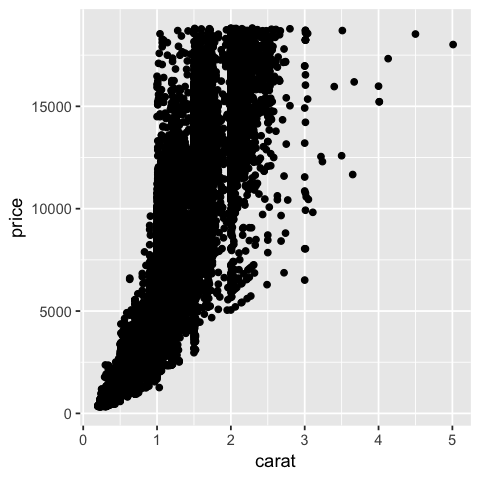

In [10]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data = diamonds) +
    geom_point(mapping = aes(x = carat, y = price))

__Controlling plots in Jupyter Notebooks__

You can control the size and quality of plots. 
- Use `options(repr.* = ...)` and `getOption('repr.*')` to set and get them, respectively.
- Example: adjust width and heigth
```R
options(repr.plot.width=7, repr.plot.height=7)
```

[Documentation](https://www.rdocumentation.org/packages/repr/versions/0.7/topics/repr-options)

__Choosing Plots and Aesthetic Elements__

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/03/taxonomy.png" width="700">

### Comparison

__Columns Charts__

If you want the heights of the bars to represent values in the data, use `geom_col()`. 

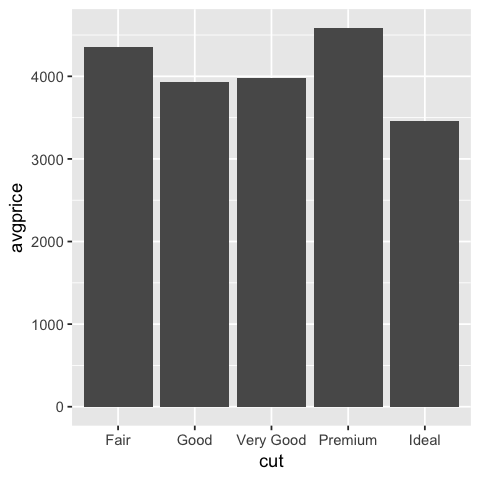

In [11]:
options(repr.plot.width=4, repr.plot.height=4)
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgprice))

There's plenty of unused (uninformative) space in the chart, so let's change the width of th bars:

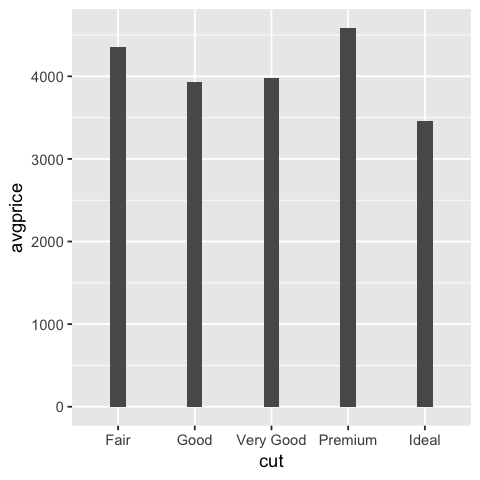

In [12]:
options(repr.plot.width=4, repr.plot.height=4)
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgprice), width=0.2)

This chart contains the same information:

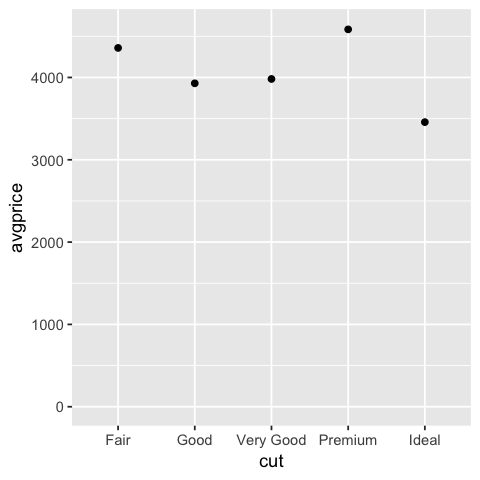

In [16]:
diamonds %>%
    group_by(cut) %>%
    summarize(avgprice = mean(price)) %>%
    ggplot() + 
      geom_point(mapping = aes(x = cut, y = avgprice))+
      ylim(c(0, 4600))

Finding an explanation (avgprice low for ideal cut) is not easy!

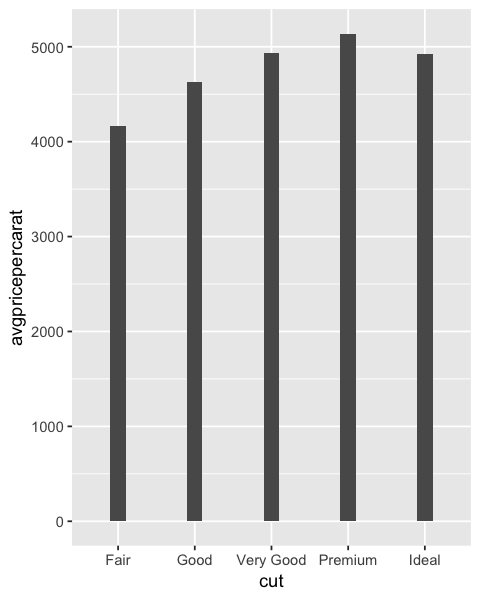

In [17]:
options(repr.plot.width=4, repr.plot.height=5)
diamonds %>%
    group_by(cut) %>%
    summarize(avgpricepercarat = mean(price)/mean(carat)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgpricepercarat), width=0.2)

Clarity as explanation?

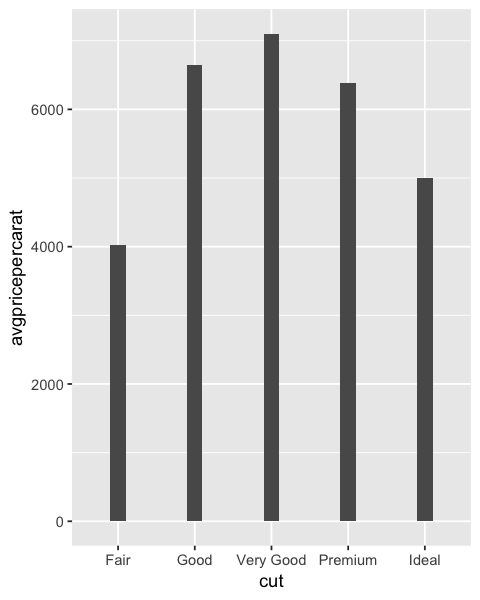

In [18]:
options(repr.plot.width=4, repr.plot.height=5)
diamonds %>%
    filter(clarity == "IF") %>%
    group_by(cut) %>%
    summarize(avgpricepercarat = mean(price)/mean(carat)) %>%
    ggplot() + 
      geom_col(mapping = aes(x = cut, y = avgpricepercarat), width=0.2)

### Composition

__Bar chart__

To examine the counts of different classes of a categorical variable, use a bar chart:

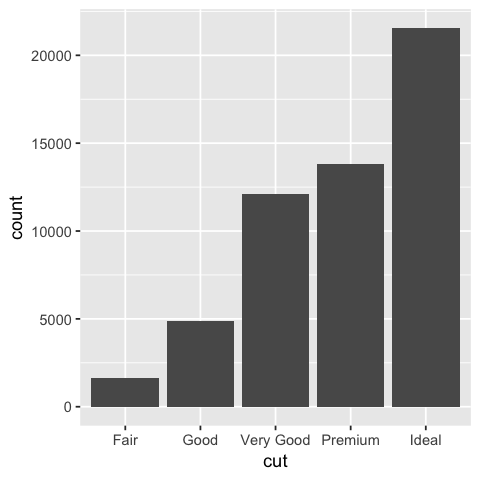

In [19]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

The algorithm used to calculate new values for a graph is called a stat, short for statistical transformation. The figure below describes how this process works with geom_bar().

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/03/visualization-stat-bar-2.png" style="width:80%">

__Why Pie Charts make do not help here__

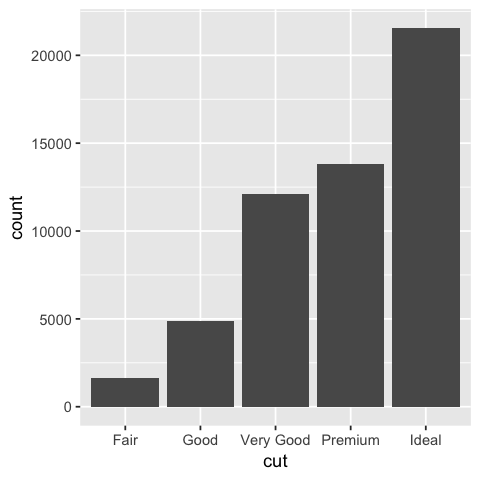

In [20]:
options(repr.plot.width=4, repr.plot.height=4)
diamonds %>%
  group_by(cut) %>%
  summarise(count = n()) -> diamonds_count
diamonds_count %>%
  ggplot() + 
  geom_col(mapping = aes(x = cut, y=count))

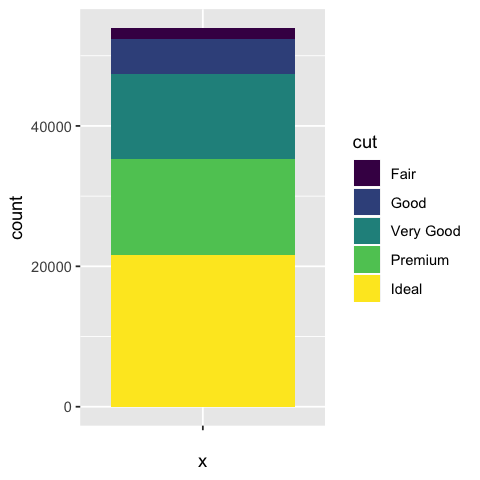

In [21]:
diamonds_count %>%
  ggplot() + 
  geom_col(mapping = aes(x = "", y=count, fill=cut))

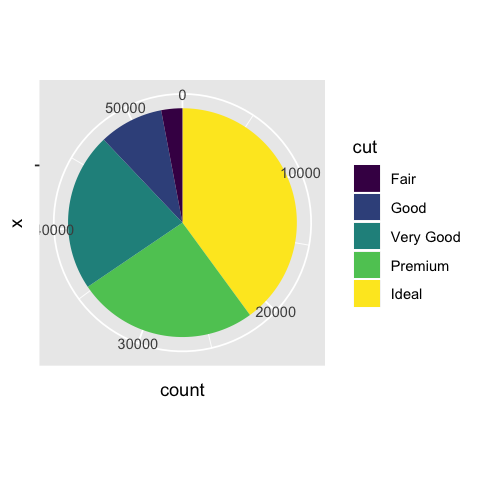

In [22]:
diamonds_count %>%
  ggplot() + 
  geom_col(mapping = aes(x = "", y=count, fill=cut)) + 
  coord_polar('y')

__Stacked Bar chart__

To examine the composition (with respect to other categorical variables) of the different classes of a categorical variable, we use a stacked bar chart:

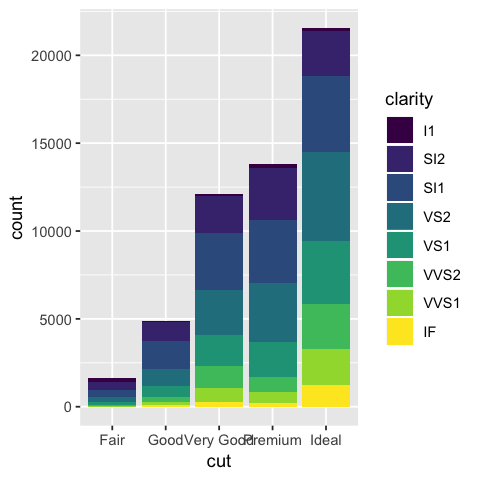

In [23]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

__100% Stacked Bar chart__

To focus exclusively on the composition (with respect to other categorical variables) of the different classes of a categorical variable, we use a 100% stacked bar chart:

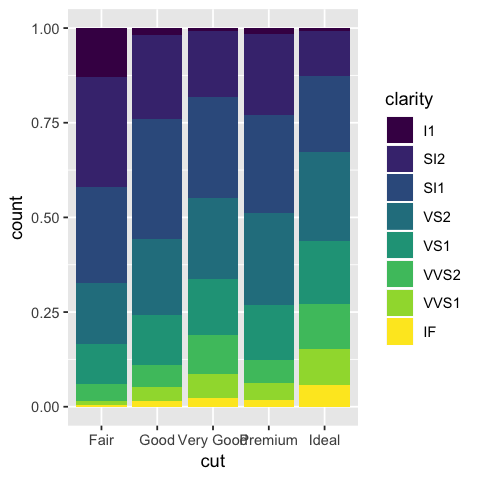

In [24]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position="fill")

### Distributions

How you visualize the distribution of a variable will depend on whether the variable is categorical or continuous. A variable is categorical if it can only take one of a small set of values. In R, categorical variables are usually saved as factors or character vectors. 

__Histograms__

To examine the distribution of a continuous variable, use a histogram. A histogram divides the x-axis into equally spaced bins and then uses the height of a bar to display the number of observations that fall in each bin. 

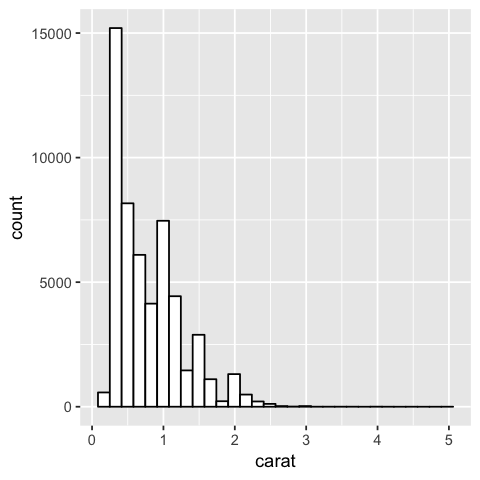

In [25]:
ggplot(data = diamonds) +
  geom_histogram(mapping = aes(x = carat), bins = 30, color="black", fill="white")

__Smoothed density estimates__

`geom_density` computes and draws kernel density estimate, which is a smoothed version of the histogram. This is a useful alternative to the histogram for continuous data that comes from an underlying smooth distribution.

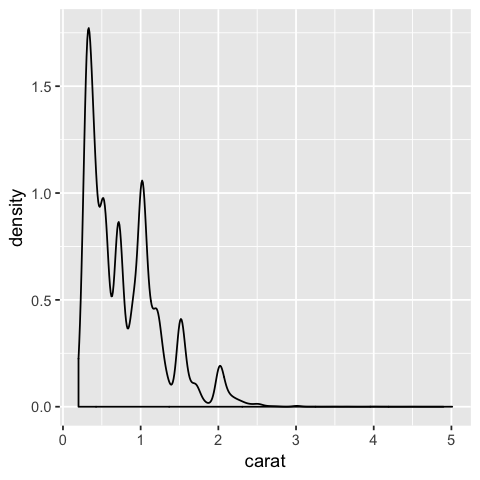

In [26]:
ggplot(data = diamonds) +
  geom_density(mapping = aes(x = carat))

__Boxplots__

You can use boxplots to display the distribution of a continuous variable broken down by a categorical variable.

- Concise way to illustrate the standard quantiles, shape, and outliers of data
- Each “box” is created according to some standard composition rules

<img src="https://raw.githubusercontent.com/wi3jmu/AIS_2019/master/notebooks/images/03/eda-boxplot.png" width="700">

[Source](https://r4ds.had.co.nz/exploratory-data-analysis.html)


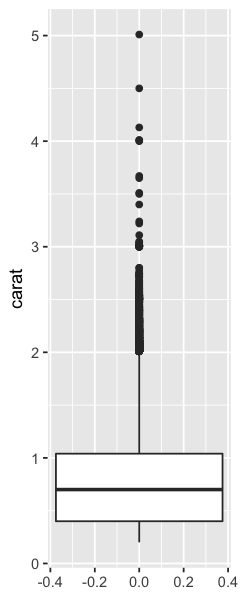

In [27]:
options(repr.plot.width=2, repr.plot.height=5)
ggplot(data = diamonds) +
  geom_boxplot(mapping = aes(y=carat))

__Comparing Distributions__

It’s common to want to explore the distribution of a continuous variable broken down by a categorical variable

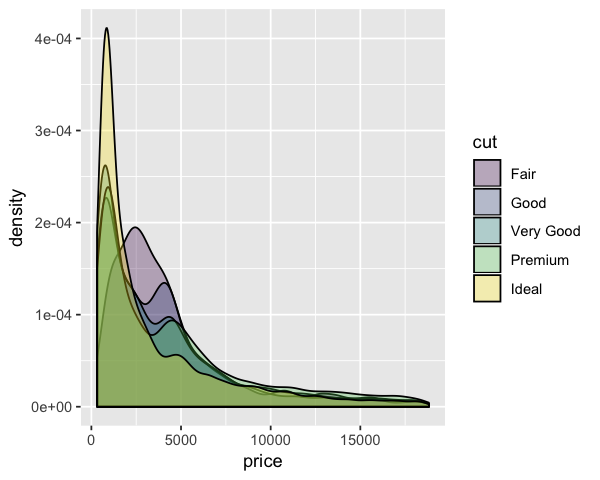

In [28]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(data = diamonds, mapping = aes(fill = cut, x = price), position="identity") +
  geom_density(alpha=0.3)

...better use boxplots!

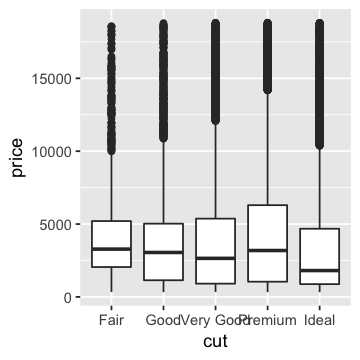

In [29]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot()

If the descriptions on the x-Axis do not fit well, flip the coordinates

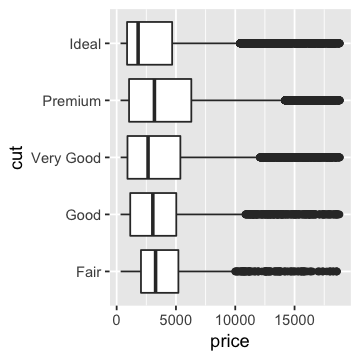

In [30]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(data = diamonds, mapping = aes(x = cut, y = price)) +
  geom_boxplot() + coord_flip()

### Relationships

If variation describes the behavior within a variable, covariation describes the behavior between variables. Covariation is the tendency for the values of two or more variables to vary together in a related way. The best way to spot covariation is to visualise the relationship between two or more variables. How you do that should again depend on the type of variables involved.

__Relationship between two continuous variables__

Using a scatterplot with two variables you can see covariation as a pattern in the points. You can see an exponential relationship between the carat size and price of a diamond.

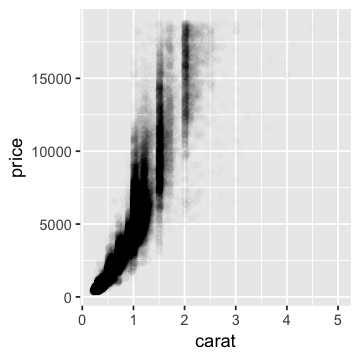

In [31]:
options(repr.plot.width=3, repr.plot.height=3)
ggplot(data = diamonds) + 
  geom_point(mapping = aes(x = carat, y = price), alpha = 1 / 100)

__Two categorical variables__

To visualise the covariation between categorical variables, you’ll need to count the number of observations for each combination

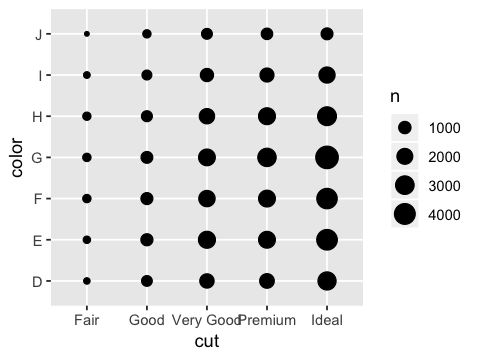

In [32]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data = diamonds) +
  geom_count(mapping = aes(x = cut, y = color))

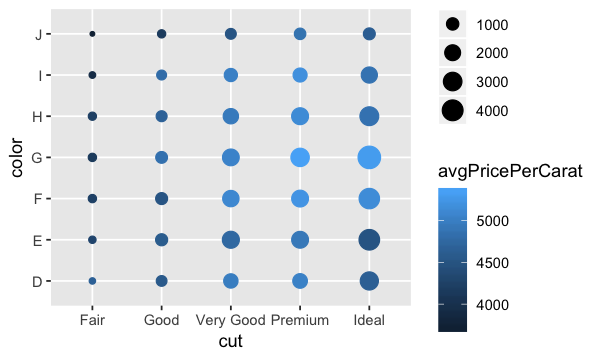

In [33]:
options(repr.plot.width=5, repr.plot.height=3)
diamonds %>%
    group_by(cut, color) %>%
    mutate(avgPricePerCarat = mean(price)/mean(carat)) %>%
    ggplot() +
      geom_count(mapping = aes(x = cut, y = color, color = avgPricePerCarat))

### Coloring

__Continuous data:__
- differences between your steps should be high enough
    - Sequential palettes (single hue vs multiple hues)
    - Diverging palettes which emphasize extremes

__Qualitative data:__
- find colors which go well together and attract the reader’s eye
    - Qualitative palettes

__RColorBrewer for color palettes__

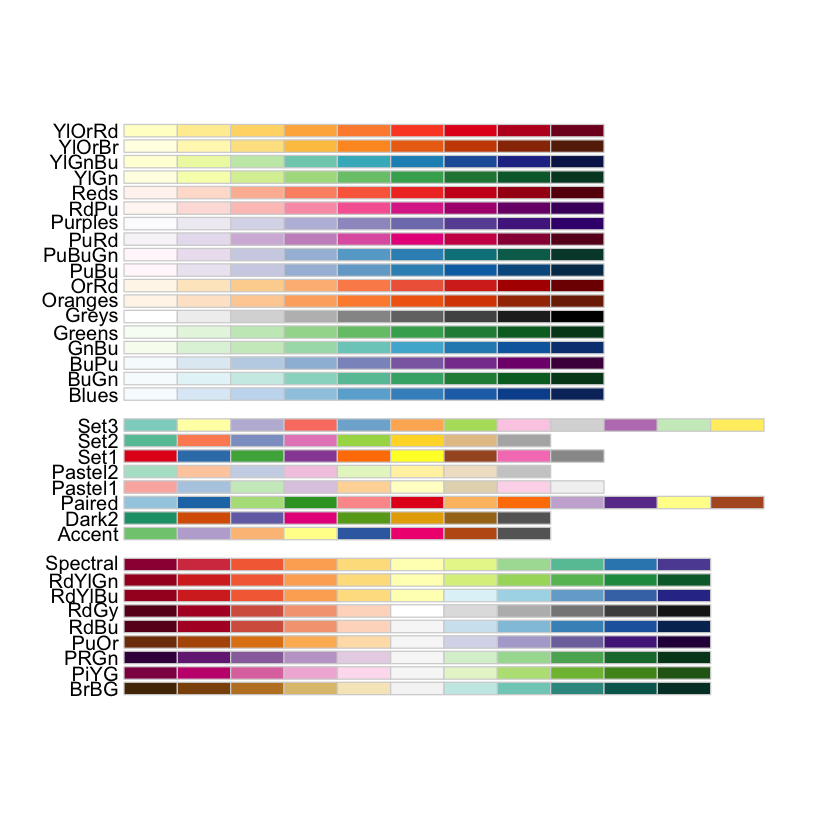

In [34]:
options(repr.plot.width=7, repr.plot.height=7)
RColorBrewer::display.brewer.all(n=NULL, type="all", select=NULL, exact.n=TRUE, colorblindFriendly=FALSE)

__Using color palettes on the `diamonds`data__

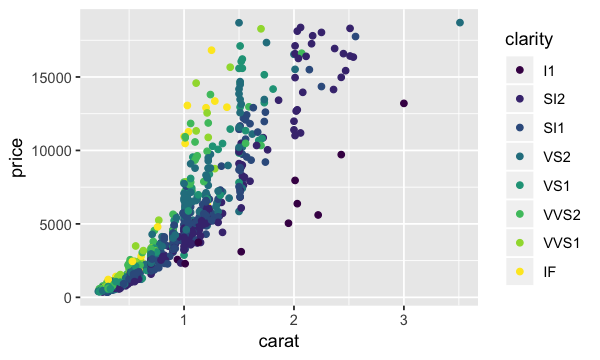

In [35]:
options(repr.plot.width=5, repr.plot.height=3)
diamonds %>% 
    sample_n(1000) %>%
    ggplot(aes(carat, price)) +
    geom_point(aes(colour = clarity)) -> d
d

Select brewer palette to use - Sequential

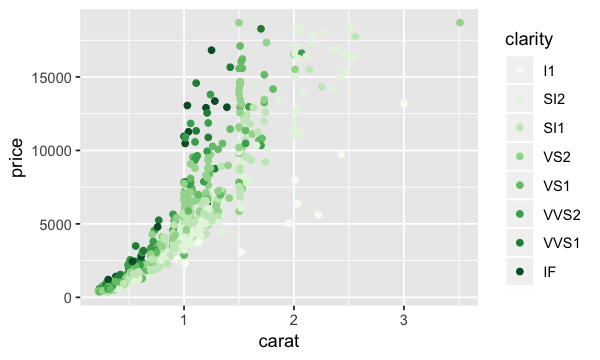

In [36]:
d + scale_colour_brewer(palette = "Greens")

Select brewer palette to use - Qualitative

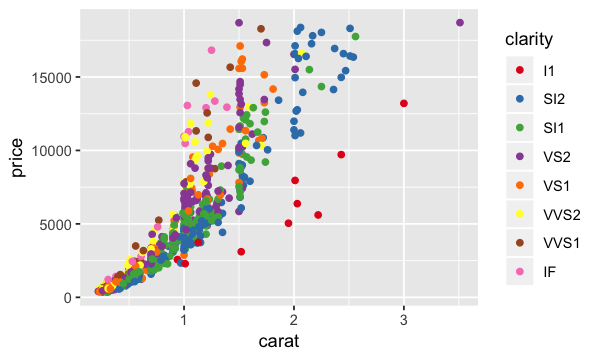

In [37]:
d + scale_colour_brewer(palette = "Set1")

`scale_fill_brewer` works just the same as `scale_colour_brewer` but for fill colours

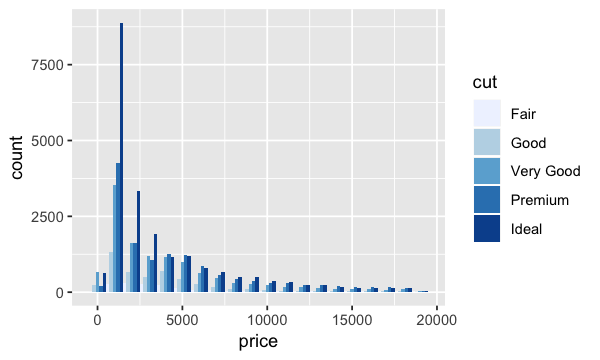

In [38]:
diamonds %>%
    ggplot(aes(x = price, fill = cut)) +
    geom_histogram(position = "dodge", binwidth = 1000) -> p
p + scale_fill_brewer(palette="Blues")

The direction of colors can be reversed

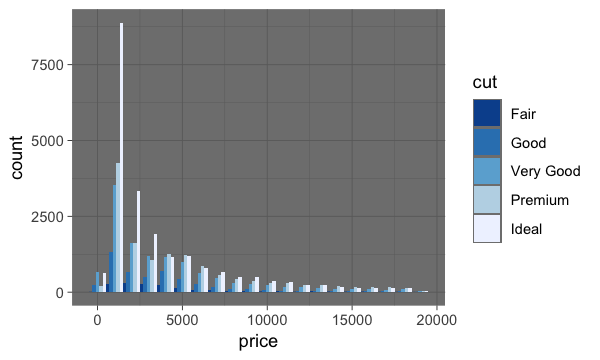

In [39]:
p + scale_fill_brewer(direction = -1) + theme_dark()

### Faceting

One way to add additional variables is with aesthetics. Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.

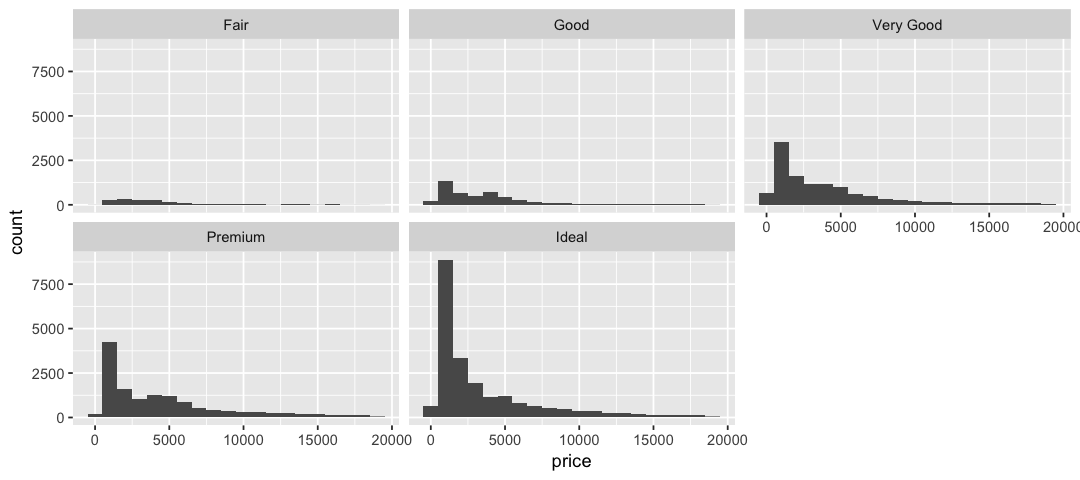

In [40]:
options(repr.plot.width=9, repr.plot.height=4)
diamonds %>%
    ggplot(aes(x = price)) +
    geom_histogram(binwidth = 1000) + 
    facet_wrap(~cut)

# Exercises

## 1. Changing tides of european footballing power

Materials from John Burn-Murdoch, Financial Times 
http://johnburnmurdoch.github.io

The top-end quality, strength-in-depth and competitive balance of European football leagues have changed markedly over the last 15 years. We want to show:

1. Which countries have the best teams?

2. Which leagues are the most/least balanced?

3. What is the 'quality gap' between a given pair of leagues?

4. How does the nth best team in league x today compare to its predecessors?

5. How have all of the above changed over time?

In [ ]:
library(tidyverse)

Load the data

In [ ]:
allSeasons <- read.csv('https://raw.githubusercontent.com/johnburnmurdoch/johnburnmurdoch.github.io/master/slides/r-ggplot/changing-tides-of-football.csv', stringsAsFactors = F)

Get to know the data

In [ ]:
# Write your code here

1. Which countries have the best teams in 2016? 
    - filter your data
    - look at the `score` 

In [ ]:
# Write your code here

2. Which leagues are the most/least balanced in 2016?
    - combine `rank`and `score`

In [ ]:
# Write your code here

3. What is the 'quality gap' between a given pair of leagues in 2016?
    - Prepare a data set of two leagues ('countries')
    - Compare the scores of the teams at each rank    

In [ ]:
# Write your code here

4. How does the nth best team in league x today compare to its predecessors in 2016?
    - Choose and filter one league

In [ ]:
# Write your code here

alternatively,

In [ ]:
# Write your code here

5. How have all of the above changed over time? 
    - Balance of leagues
    - Use `facet_wrap`

In [ ]:
# Write your code here

5. How have all of the above changed over time? 
     - Quality gap between a pair of leagues

In [ ]:
# Write your code here

## 2. Exam Questions

### 2.1 Exam AIS WS 2018/19
__Question 2: Descriptive Analytics__

(b) (3 Points) __Color palettes__: In the lecture we discussed that color palettes should reflect the underlying data types. Recommend a suitable palette choice for the following data sets:

i. (1 points) Daily stock performance measured as percent change

In [ ]:
# Write your answer here

ii. (1 points) Annual sales data of a single company

In [ ]:
# Write your answer here

iii. (1 points) Monthly earnings data of a single company

In [ ]:
# Write your answer here

iv. (1 points) Distinguishing different companies in stock price charts

In [ ]:
# Write your answer here

v. (1 points) Points in AIS exam achieved by students ranging from 0 to 60

In [ ]:
# Write your answer here

vi. (1 points) Coloring countries on a map based on the population's favorite sport

In [ ]:
# Write your answer here

### 2.2 Exam SS 2018
__Question 2: Descriptive Analytics__

(a) (4 points) __Plots and Colors__ In the lecture, you learned about different types of visualizations. Additionally, we talked about color palettes. Your task is to visualize the following data sets. Which plots and color palettes do you recommend? Sketch the plots and highlight for each data set what you are trying to achieve with your visualization.

\begin{array}{|l|l|}
    \hline
    Fund ID & Performance \\
    \hline
    1         & $+7.03\%$        \\
    2         & $+3.14\%$         \\
    3         & $-1.12\%$         \\
    4         & $-5.87\%$          \\
    \dots       & \dots        \\
    \hline
\end{array}
<center>
(a) Asset Management
<center>

Solution: 

In [ ]:
# Write your answer here

Plotting the solution using ggplot2 (___not___ in exam)

In [ ]:
library(tidyverse)
asset_performance <- tribble(
  ~FundID, ~Performance,
  "1",     7.03,
  "2",     3.14,
  "3",     -1.12,
  "4",     -2.84)

In [ ]:
# Write your code here

[...] Your task is to visualize the following data sets. Which plots and color palettes do you recommend? Sketch the plots and highlight for each data set what you are trying to achieve with your visualization.

\begin{array}{|l|l|l|}
    \hline
    Employee ID & Gender & Income\\
    \hline
    1       & male      &    80,000 \\
    2       & female    &   70,000 \\
    3       & male      &   35,000 \\
    4       & female    &   37,000 \\
    \dots   & \dots           & \dots \\
    \hline
\end{array}

<center>
(b) Gender Pay Gap
<center>

Solution:

In [ ]:
# Write your answer here

Generating sample data (___not___ in exam)

In [ ]:
n=5000
tibble(EmployeeID = 1:n,
       Gender = sample(c("male","female"), size = n, replace = T)) %>%
       mutate(Income = if_else(Gender=="female", 
                            rnorm(n = n, mean = 40000, sd = 5000),
                            rnorm(n = n, mean = 45000, sd = 10000))) -> gender
gender %>% head()

Plotting the solution using ggplot2 (___not___ in exam)

In [ ]:
# Write your code here